In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [2]:
file_2017 = "Resources/state_M2017_dl.xlsx"
file_2016 = "Resources/state_M2016_dl.xlsx"
file_2015 = "Resources/state_M2015_dl.xlsx"
file_2014 = "Resources/state_M2014_dl.xlsx"
file_2013 = "Resources/state_M2013_dl.xlsx"
census_state_pop = "Resources/Census_Bureau_State_Pop_Est_Rev.xlsx"

codes = ["15-0000", "15-1121", "15-1122", "15-1131", "15-1132", "15-1133", "15-1134", "15-1141", "15-1142", "15-1143", "15-1151", "15-1152", "15-1199", "15-2031", "15-2041"]


# Merge Files and Create Dateframe:

In [3]:
state_2017_df = pd.read_excel(file_2017, index_col=None)
state_2017_df = state_2017_df.replace("**", np.nan)
state_2017_df= state_2017_df[state_2017_df["OCC_CODE"].isin(codes)]
state_2017_df = state_2017_df[["STATE", "OCC_CODE", "OCC_TITLE", "TOT_EMP"]].dropna()
state_2017_df.head()

,STATE,OCC_CODE,OCC_TITLE,TOT_EMP
63,Alabama,15-0000,Computer and Mathematical Occupations,39760.0
64,Alabama,15-1121,Computer Systems Analysts,4010.0
65,Alabama,15-1122,Information Security Analysts,1100.0
66,Alabama,15-1131,Computer Programmers,7420.0
67,Alabama,15-1132,"Software Developers, Applications",5540.0


In [4]:
state_2016_df = pd.read_excel(file_2016, index_col=None)
state_2016_df = state_2016_df.replace("**", np.nan)
state_2016_df= state_2016_df[state_2016_df["OCC_CODE"].isin(codes)]
state_2016_df = state_2016_df[["STATE", "OCC_CODE", "OCC_TITLE", "TOT_EMP"]].dropna()
state_2016_df.head()

,STATE,OCC_CODE,OCC_TITLE,TOT_EMP
65,Alabama,15-0000,Computer and Mathematical Occupations,38600.0
67,Alabama,15-1121,Computer Systems Analysts,4020.0
68,Alabama,15-1122,Information Security Analysts,970.0
69,Alabama,15-1131,Computer Programmers,6590.0
70,Alabama,15-1132,"Software Developers, Applications",5500.0


In [5]:
combined_df_16 = pd.merge(state_2016_df, state_2017_df, how='outer', on=['STATE', 'OCC_CODE', "OCC_TITLE"])
combined_df_16 = combined_df_16.rename(columns={"TOT_EMP_x":"2016 Total Employees", "TOT_EMP_y":"2017 Total Employees"})
combined_df_16.head()

,STATE,OCC_CODE,OCC_TITLE,2016 Total Employees,2017 Total Employees
0,Alabama,15-0000,Computer and Mathematical Occupations,38600.0,39760.0
1,Alabama,15-1121,Computer Systems Analysts,4020.0,4010.0
2,Alabama,15-1122,Information Security Analysts,970.0,1100.0
3,Alabama,15-1131,Computer Programmers,6590.0,7420.0
4,Alabama,15-1132,"Software Developers, Applications",5500.0,5540.0


In [6]:
state_2015_df = pd.read_excel(file_2015, index_col=None)
state_2015_df = state_2015_df.replace("**", np.nan)
state_2015_df= state_2015_df[state_2015_df["OCC_CODE"].isin(codes)]
state_2015_df = state_2015_df[["STATE", "OCC_CODE", "OCC_TITLE", "TOT_EMP"]].dropna()
state_2015_df.head()

,STATE,OCC_CODE,OCC_TITLE,TOT_EMP
65,Alabama,15-0000,Computer and Mathematical Occupations,38260.0
67,Alabama,15-1121,Computer Systems Analysts,4170.0
68,Alabama,15-1122,Information Security Analysts,1170.0
69,Alabama,15-1131,Computer Programmers,5850.0
70,Alabama,15-1132,"Software Developers, Applications",4750.0


In [7]:
combined_df_15 = pd.merge(state_2015_df, combined_df_16, how='outer', on=['STATE', 'OCC_CODE', "OCC_TITLE"])
combined_df_15 = combined_df_15.rename(columns={"TOT_EMP":"2015 Total Employees"})
combined_df_15.head()

,STATE,OCC_CODE,OCC_TITLE,2015 Total Employees,2016 Total Employees,2017 Total Employees
0,Alabama,15-0000,Computer and Mathematical Occupations,38260.0,38600.0,39760.0
1,Alabama,15-1121,Computer Systems Analysts,4170.0,4020.0,4010.0
2,Alabama,15-1122,Information Security Analysts,1170.0,970.0,1100.0
3,Alabama,15-1131,Computer Programmers,5850.0,6590.0,7420.0
4,Alabama,15-1132,"Software Developers, Applications",4750.0,5500.0,5540.0


In [8]:
state_2014_df = pd.read_excel(file_2014, index_col=None)
state_2014_df = state_2014_df.replace("**", np.nan)
state_2014_df= state_2014_df[state_2014_df["OCC_CODE"].isin(codes)]
state_2014_df = state_2014_df[["STATE", "OCC_CODE", "OCC_TITLE", "TOT_EMP"]].dropna()
state_2014_df.head()

,STATE,OCC_CODE,OCC_TITLE,TOT_EMP
65,Alabama,15-0000,Computer and Mathematical Occupations,39420.0
67,Alabama,15-1121,Computer Systems Analysts,6110.0
68,Alabama,15-1122,Information Security Analysts,1270.0
69,Alabama,15-1131,Computer Programmers,5550.0
70,Alabama,15-1132,"Software Developers, Applications",3850.0


In [9]:
combined_df_14 = pd.merge(state_2014_df, combined_df_15, how='outer', on=['STATE', 'OCC_CODE', 'OCC_TITLE'])
combined_df_14 = combined_df_14.rename(columns={"TOT_EMP":"2014 Total Employees"})
combined_df_14.head()

,STATE,OCC_CODE,OCC_TITLE,2014 Total Employees,2015 Total Employees,2016 Total Employees,2017 Total Employees
0,Alabama,15-0000,Computer and Mathematical Occupations,39420.0,38260.0,38600.0,39760.0
1,Alabama,15-1121,Computer Systems Analysts,6110.0,4170.0,4020.0,4010.0
2,Alabama,15-1122,Information Security Analysts,1270.0,1170.0,970.0,1100.0
3,Alabama,15-1131,Computer Programmers,5550.0,5850.0,6590.0,7420.0
4,Alabama,15-1132,"Software Developers, Applications",3850.0,4750.0,5500.0,5540.0


In [10]:
state_2013_df = pd.read_excel(file_2013, index_col=None)
state_2013_df = state_2013_df.replace("**", np.nan)
state_2013_df= state_2013_df[state_2013_df["OCC_CODE"].isin(codes)]
state_2013_df = state_2013_df[["STATE", "OCC_CODE", "OCC_TITLE", "TOT_EMP"]].dropna()
state_2013_df.head()

,STATE,OCC_CODE,OCC_TITLE,TOT_EMP
66,Alabama,15-0000,Computer and Mathematical Occupations,40350.0
68,Alabama,15-1121,Computer Systems Analysts,5770.0
69,Alabama,15-1122,Information Security Analysts,1820.0
70,Alabama,15-1131,Computer Programmers,5260.0
71,Alabama,15-1132,"Software Developers, Applications",3810.0


In [11]:
combined_df_All = pd.merge(state_2013_df, combined_df_14, how='outer', on=['STATE', 'OCC_CODE', 'OCC_TITLE'])
combined_df_All = combined_df_All.rename(columns={"TOT_EMP":"2013 Total Employees"})
combined_df_All.head()

,STATE,OCC_CODE,OCC_TITLE,2013 Total Employees,2014 Total Employees,2015 Total Employees,2016 Total Employees,2017 Total Employees
0,Alabama,15-0000,Computer and Mathematical Occupations,40350.0,39420.0,38260.0,38600.0,39760.0
1,Alabama,15-1121,Computer Systems Analysts,5770.0,6110.0,4170.0,4020.0,4010.0
2,Alabama,15-1122,Information Security Analysts,1820.0,1270.0,1170.0,970.0,1100.0
3,Alabama,15-1131,Computer Programmers,5260.0,5550.0,5850.0,6590.0,7420.0
4,Alabama,15-1132,"Software Developers, Applications",3810.0,3850.0,4750.0,5500.0,5540.0


In [12]:
print(combined_df_All.columns.values)

['STATE' 'OCC_CODE' 'OCC_TITLE' '2013 Total Employees'
 '2014 Total Employees' '2015 Total Employees' '2016 Total Employees'
 '2017 Total Employees']


In [13]:
us_summation = combined_df_All.groupby(["OCC_CODE", "OCC_TITLE"])[["2013 Total Employees", "2014 Total Employees", "2015 Total Employees", "2016 Total Employees", "2017 Total Employees"]].sum().reset_index()
pd.options.display.float_format = '{:,.0f}'.format
us_summation["AREA"] = "Total US"
us_summation = us_summation[["OCC_CODE", "OCC_TITLE", "AREA", "2013 Total Employees", "2014 Total Employees", "2015 Total Employees", "2016 Total Employees", "2017 Total Employees"]]
us_summation.head(10)

,OCC_CODE,OCC_TITLE,AREA,2013 Total Employees,2014 Total Employees,2015 Total Employees,2016 Total Employees,2017 Total Employees
0,15-0000,Computer and Mathematical Occupations,Total US,"3,706,450","3,844,270","4,015,550","4,176,390","4,273,060"
1,15-1121,Computer Systems Analysts,Total US,"507,770","529,440","557,670","570,190","583,230"
2,15-1122,Information Security Analysts,Total US,"78,180","80,400","89,110","95,480","105,570"
3,15-1131,Computer Programmers,Total US,"313,720","303,440","290,670","272,650","242,140"
4,15-1132,"Software Developers, Applications",Total US,"644,150","686,950","746,050","794,430","849,460"
5,15-1133,"Software Developers, Systems Software",Total US,"373,930","380,070","388,140","408,730","394,470"
6,15-1134,Web Developers,Total US,"112,910","121,150","127,190","129,760","126,050"
7,15-1141,Database Administrators,Total US,"115,300","112,590","114,210","114,210","114,140"
8,15-1142,Network and Computer Systems Administrators,Total US,"363,170","366,290","375,340","377,780","376,100"
9,15-1143,Computer Network Architects,Total US,"141,680","140,390","147,060","157,660","158,460"


In [14]:
states_summation = combined_df_All.groupby(["OCC_CODE", "OCC_TITLE", "STATE"])[["2013 Total Employees", "2014 Total Employees", "2015 Total Employees", "2016 Total Employees", "2017 Total Employees"]].sum().reset_index()
pd.options.display.float_format = '{:,.0f}'.format
states_summation = states_summation.rename(columns={"STATE":"AREA"})
states_summation.head(10)

,OCC_CODE,OCC_TITLE,AREA,2013 Total Employees,2014 Total Employees,2015 Total Employees,2016 Total Employees,2017 Total Employees
0,15-0000,Computer and Mathematical Occupations,Alabama,"40,350","39,420","38,260","38,600","39,760"
1,15-0000,Computer and Mathematical Occupations,Alaska,"5,240","5,030","5,210","5,050","5,450"
2,15-0000,Computer and Mathematical Occupations,Arizona,"76,040","82,500","88,800","93,410","93,490"
3,15-0000,Computer and Mathematical Occupations,Arkansas,"20,410","21,420","22,930","23,700","23,850"
4,15-0000,Computer and Mathematical Occupations,California,"486,470","514,330","548,800","580,040","590,550"
5,15-0000,Computer and Mathematical Occupations,Colorado,"91,820","96,120","97,840","104,170","109,450"
6,15-0000,Computer and Mathematical Occupations,Connecticut,"44,920","46,180","46,970","49,220","49,630"
7,15-0000,Computer and Mathematical Occupations,Delaware,"12,850","13,570","15,030","16,200","17,560"
8,15-0000,Computer and Mathematical Occupations,District of Columbia,"35,000","37,270","39,020","41,390","42,910"
9,15-0000,Computer and Mathematical Occupations,Florida,"164,480","172,340","184,270","193,670","198,940"


In [15]:
unified_df = us_summation.append(states_summation, ignore_index=True)
unified_df["2017 % Growth"] = ((unified_df["2017 Total Employees"]/unified_df["2016 Total Employees"])-1)*100
unified_df["2016 % Growth"] = ((unified_df["2016 Total Employees"]/unified_df["2015 Total Employees"])-1)*100
unified_df["2015 % Growth"] = ((unified_df["2015 Total Employees"]/unified_df["2014 Total Employees"])-1)*100
unified_df["2014 % Growth"] = ((unified_df["2014 Total Employees"]/unified_df["2013 Total Employees"])-1)*100

In [16]:
unified_df_NL = list(unified_df[unified_df.OCC_CODE == "15-0000"].nlargest(5, "2017 % Growth")["AREA"])
unified_df_NS = list(unified_df[unified_df.OCC_CODE == "15-0000"].nsmallest(5, "2017 % Growth")["AREA"])

In [17]:
unified_df_tot = unified_df[unified_df["OCC_CODE"] == "15-0000"]
unified_df_tot = unified_df_tot[["AREA", "2014 % Growth", "2015 % Growth", "2016 % Growth", "2017 % Growth"]]

unified_df_tot_T = unified_df_tot.set_index('AREA').T
unified_df_tot_T

AREA,Total US,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
2014 % Growth,4,-2,-4,8,5,6,5,3,6,6,...,1,7,7,3,-3,-2,-3,7,6,-1
2015 % Growth,4,-3,4,8,7,7,2,2,11,5,...,3,6,5,4,0,-0,5,-1,5,-3
2016 % Growth,4,1,-3,5,3,6,6,5,8,6,...,7,-1,11,4,-5,2,4,9,8,0
2017 % Growth,2,3,8,0,1,2,5,1,8,4,...,7,1,8,3,0,2,6,2,2,0



# Create Charts:

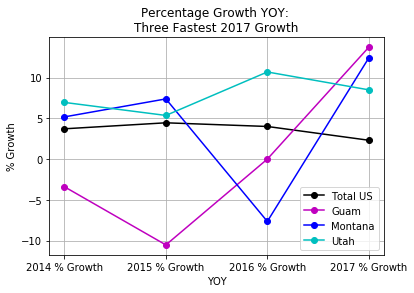

In [18]:
fig, ax = plt.subplots()

area = ["2014 % Growth", "2015 % Growth", "2016 % Growth", "2017 % Growth"]
total_us = unified_df_tot_T["Total US"]
first = ''.join(map(str, unified_df_NL[0]))
second = ''.join(map(str, unified_df_NL[1]))
third = ''.join(map(str, unified_df_NL[2]))

state1 = unified_df_tot_T[first]
state2 = unified_df_tot_T[second]
state3 = unified_df_tot_T[third]

ax.plot(area, total_us, 'ok-')
ax.plot(area, state1, 'om-')
ax.plot(area, state2, 'ob-')
ax.plot(area, state3, 'oc-')

ax.set_xlabel("YOY")
ax.set_ylabel("% Growth")

plt.title("Percentage Growth YOY: \nThree Fastest 2017 Growth")
plt.legend(loc="best")
plt.grid()
plt.show()

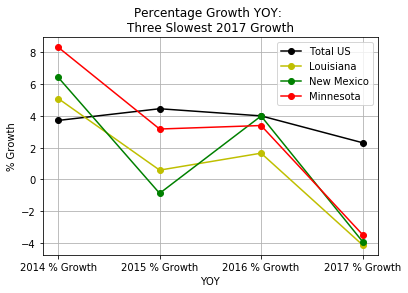

In [19]:
fig, ax = plt.subplots()

first_ = ''.join(map(str, unified_df_NS[0]))
second_ = ''.join(map(str, unified_df_NS[1]))
third_ = ''.join(map(str, unified_df_NS[2]))

state_1 = unified_df_tot_T[first_]
state_2 = unified_df_tot_T[second_]
state_3 = unified_df_tot_T[third_]

ax.plot(area, total_us, 'ok-')
ax.plot(area, state_1, 'oy-')
ax.plot(area, state_2, 'og-')
ax.plot(area, state_3, 'or-')

ax.set_xlabel("YOY")
ax.set_ylabel("% Growth")

plt.title("Percentage Growth YOY: \nThree Slowest 2017 Growth")
plt.legend(loc="best")
plt.grid()
plt.show()


# Vs State Population:

In [20]:
# scatter plot by population vs jobs added
xarea = ["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "District of Columbia", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming", "Puerto Rico"]

census_state_pop_df = pd.read_excel(census_state_pop, index_col=None)
census_state_pop_df = census_state_pop_df[census_state_pop_df["AREA"].isin(xarea)]
# print(len(census_state_pop_df["AREA"]))

unified_df_tot_new = unified_df_tot[unified_df_tot["AREA"].isin(xarea)]
# print(len(unified_df_tot_new["AREA"]))

pop_graph_df = pd.merge(census_state_pop_df, unified_df_tot_new, how='outer', on=["AREA"])
list(pop_graph_df.columns.values)
pop_graph_df_17 = pop_graph_df[[2017, "2017 % Growth"]]
pop_graph_df_17.head()

,2017,2017 % Growth
0,4875120,3
1,739786,8
2,7048876,0
3,3002997,1
4,39399349,2
